# Explorative Datenanlyse für Zwischenpräsentation 2

**Modul:** Statistik II (HS25)

## Ziel der Zwischenpräsentation
- Datenqualität und Plausibilität prüfen
- Explorative Visualisierungen
- Können Hypothesen bearbeitet werden

> Dieses Notebook dokumentiert die **explorative Datenanalyse (EDA)**
> im Rahmen der zweiten Zwischenpräsentation.
> Es enthält bewusst **keine statistischen Modelle** und **keine Tests**.



In [1]:
#Basis
import pandas as pd
import numpy as np
from pathlib import Path

#Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = Path("data")

df = pd.read_csv(DATA_DIR / "data.csv")
df_loc = pd.read_csv(DATA_DIR / "loc.csv")

df.head(), df_loc.head()


(   FK_STANDORT             DATUM  VELO_IN  VELO_OUT  FUSS_IN  FUSS_OUT  \
 0         5003  2023-01-01T00:00      NaN       NaN      1.0       0.0   
 1         4257  2023-01-01T00:00      0.0       0.0      NaN       NaN   
 2          394  2023-01-01T00:00      NaN       NaN      1.0       1.0   
 3         2986  2023-01-01T00:00      0.0       0.0      NaN       NaN   
 4         3598  2023-01-01T00:00      0.0       0.0      NaN       NaN   
 
        OST     NORD  
 0  2682978  1248744  
 1  2681857  1251991  
 2  2683573  1251687  
 3  2684578  1251966  
 4  2684006  1246566  ,
    objectid  id1   fk_zaehler abkuerzung              bezeichnung  \
 0         1    7  ECO09113500   VZS_BINZ         Binzmühlestrasse   
 1         2   16  ECO09113505   VZS_BUCH             Bucheggplatz   
 2         3   53  Y0412032046   VZS_KLOW         Kloster-Fahr-Weg   
 3         4   13  ECO09113507   VZS_HOFW         Hofwiesenstrasse   
 4         5   61  Y2G14045587   VZS_LIMB  Limmatquai --> B

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949660 entries, 0 to 949659
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FK_STANDORT  949660 non-null  int64  
 1   DATUM        949660 non-null  object 
 2   VELO_IN      784582 non-null  float64
 3   VELO_OUT     685040 non-null  float64
 4   FUSS_IN      165078 non-null  float64
 5   FUSS_OUT     165078 non-null  float64
 6   OST          949660 non-null  int64  
 7   NORD         949660 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 58.0+ MB


In [4]:
df.describe(include="all")


,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
count,949660.000000,949660,784582.000000,685040.000000,165078.000000,165078.000000,9.496600e+05,9.496600e+05
unique,NaN,35036,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-10-29T02:45,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN
mean,3378.052822,NaN,9.697068,6.143881,17.046851,12.956033,2.682599e+06,1.248381e+06
std,1104.475705,NaN,14.986183,8.706618,22.467212,18.822849,9.750726e+02,1.884545e+03
min,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,2.679767e+06,1.244140e+06
25%,2991.000000,NaN,1.000000,0.000000,1.000000,1.000000,2.682278e+06,1.247065e+06
50%,3279.000000,NaN,4.000000,3.000000,8.000000,6.000000,2.682689e+06,1.248328e+06
75%,4257.000000,NaN,12.000000,9.000000,24.000000,18.000000,2.683404e+06,1.248986e+06


## Überblick über die Velodaten

- Zeitvariable: `DATUM` (Zeitstempel mit Datum und Uhrzeit)
- Standortvariable: `FK_STANDORT`
- Zählvariablen: `VELO_IN`, `VELO_OUT`
- Weitere Variablen: Fussgängerzählungen, Koordinaten

Die Velodaten liegen als hochfrequente Zeitreihendaten vor
und eignen sich grundsätzlich für eine zeitliche Analyse.


In [5]:
df_loc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   objectid             173 non-null    int64  
 1   id1                  173 non-null    int64  
 2   fk_zaehler           173 non-null    object 
 3   abkuerzung           173 non-null    object 
 4   bezeichnung          173 non-null    object 
 5   von                  173 non-null    int64  
 6   bis                  145 non-null    float64
 7   richtung_in          173 non-null    object 
 8   richtung_out         169 non-null    object 
 9   korrekturfaktor      173 non-null    float64
 10  status               173 non-null    object 
 11  has_geschwindigkeit  173 non-null    int64  
 12  velo                 173 non-null    int64  
 13  fuss                 173 non-null    int64  
 14  geometry             173 non-null    object 
dtypes: float64(2), int64(6), object(7)
memor

## Standortdaten (loc.csv)

Die Datei `loc.csv` enthält **statische Standortinformationen**
(z.B. Namen, IDs, Koordinaten).

Diese Daten werden **nicht zeitlich analysiert**, sondern dienen
ausschliesslich dazu, einzelne Stationen (z.B. Langstrasse)
eindeutig zu identifizieren und zu filtern.


In [6]:
df["DATUM"] = pd.to_datetime(df["DATUM"], errors="coerce")
df = df.sort_values("DATUM").reset_index(drop=True)

df[["DATUM"]].head()


,DATUM
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01


In [7]:
df.isna().mean().sort_values(ascending=False)


FUSS_IN        0.826171
FUSS_OUT       0.826171
VELO_OUT       0.278647
VELO_IN        0.173829
FK_STANDORT    0.000000
DATUM          0.000000
OST            0.000000
NORD           0.000000
dtype: float64

In [8]:
df["minute"] = df["DATUM"].dt.minute
df["minute"].value_counts().sort_index()


minute
0     237414
15    237411
30    237417
45    237418
Name: count, dtype: int64

## Plausibilitätsprüfung

- Die Zeitvariable liegt als Zeitstempel vor.
- Die Daten folgen einem regelmässigen zeitlichen Raster
  (z.B. 15-Minuten-Intervalle).
- Fehlende Werte treten insbesondere bei einzelnen Zählvariablen auf
  und werden in der weiteren Analyse berücksichtigt.


In [9]:
# Beispiel: Stationen mit 'Langstrasse' im Namen
lang_stations = df_loc[df_loc.apply(
    lambda row: row.astype(str).str.contains("Lang", case=False).any(), axis=1
)]

lang_ids = lang_stations["id1"].unique().tolist()
print("Langstrasse IDs:", lang_ids)



Langstrasse IDs: [60, 57, 55, 2962, 4260, 39, 30, 20, 2319, 3597, 2320, 2989, 722, 4262, 3277, 1997, 2961, 4241, 4242, 2637, 4247, 2980, 4249]


In [10]:
df_ls = df[df["FK_STANDORT"].isin(lang_ids)].copy()
df_ls["FK_STANDORT"].value_counts()


FK_STANDORT
4241    35040
2989    35040
4242    35040
4249    35036
4262    24580
20       7776
2961     7776
60       7681
4247     1920
4260     1824
Name: count, dtype: int64

## Eingrenzung auf die Station Langstrasse

Die Analyse wird bewusst auf die Station **Langstrasse** beschränkt.
Die zugehörigen Standort-IDs wurden über die Standortdaten (`loc.csv`)
identifiziert.

Alle weiteren Auswertungen beziehen sich ausschliesslich auf diese Station.


In [11]:
df_ls["DATUM_TAG"] = df_ls["DATUM"].dt.date

df_ls[["DATUM", "DATUM_TAG"]].head()


,DATUM,DATUM_TAG
2,2023-01-01,2023-01-01
14,2023-01-01,2023-01-01
16,2023-01-01,2023-01-01
17,2023-01-01,2023-01-01
24,2023-01-01,2023-01-01


In [12]:
df_ls_daily = (
    df_ls
    .groupby("DATUM_TAG", as_index=False)
    .agg({
        "VELO_IN": "sum",
        "VELO_OUT": "sum"
    })
)

df_ls_daily.head()


,DATUM_TAG,VELO_IN,VELO_OUT
0,2023-01-01,2183.0,847.0
1,2023-01-02,2720.0,985.0
2,2023-01-03,3674.0,1242.0
3,2023-01-04,5048.0,1682.0
4,2023-01-05,5519.0,1798.0


In [13]:
df_ls_daily.describe()


,VELO_IN,VELO_OUT
count,365.000000,365.000000
mean,7135.243836,2356.682192
std,2850.628897,918.071544
min,1184.000000,354.000000
25%,5150.000000,1761.000000
50%,6911.000000,2252.000000
75%,8907.000000,3013.000000
max,13422.000000,4504.000000


## Tagesaggregation der Velodaten

Die Velodaten liegen in einer hochfrequenten zeitlichen Auflösung vor
(z.B. 15-Minuten-Intervalle). Für die explorative Analyse wurden die Daten
auf **Tagesebene aggregiert**.

Dabei wurden die täglichen Summen von `VELO_IN` und `VELO_OUT` berechnet.
Diese Aggregation reduziert kurzfristige Schwankungen und ermöglicht
eine übersichtliche Darstellung der Zeitreihe.

Die Tageswerte bilden die Grundlage für die nachfolgenden Visualisierungen.


In [14]:
df_ls_daily["VELO_TOTAL"] = df_ls_daily["VELO_IN"] + df_ls_daily["VELO_OUT"]
df_ls_daily.head()


,DATUM_TAG,VELO_IN,VELO_OUT,VELO_TOTAL
0,2023-01-01,2183.0,847.0,3030.0
1,2023-01-02,2720.0,985.0,3705.0
2,2023-01-03,3674.0,1242.0,4916.0
3,2023-01-04,5048.0,1682.0,6730.0
4,2023-01-05,5519.0,1798.0,7317.0


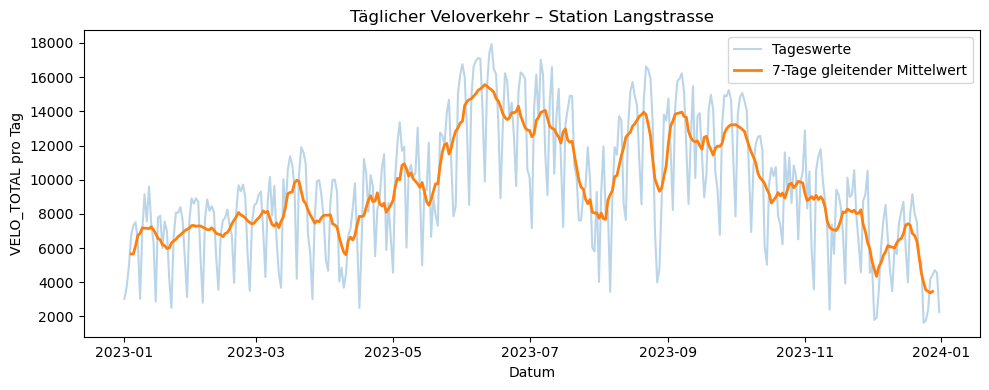

In [15]:
df_ls_daily = df_ls_daily.sort_values("DATUM_TAG")

df_ls_daily["VELO_TOTAL_MA7"] = (
    df_ls_daily["VELO_TOTAL"]
    .rolling(window=7, center=True)
    .mean()
)

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(
    df_ls_daily["DATUM_TAG"],
    df_ls_daily["VELO_TOTAL"],
    alpha=0.3,
    label="Tageswerte"
)

ax.plot(
    df_ls_daily["DATUM_TAG"],
    df_ls_daily["VELO_TOTAL_MA7"],
    linewidth=2,
    label="7-Tage gleitender Mittelwert"
)

ax.set_title("Täglicher Veloverkehr – Station Langstrasse")
ax.set_xlabel("Datum")
ax.set_ylabel("VELO_TOTAL pro Tag")
ax.legend()

plt.tight_layout()
plt.show()


## Kurzfristige Schwankungen und Wochenend-Effekte

Die tägliche Zeitreihe des Veloverkehrs weist starke kurzfristige Schwankungen auf.
Diese sogenannte „Zackigkeit“ ist typisch für Tagesdaten und lässt sich
hauptsächlich durch Wochentags- und Wochenend-Effekte erklären.

Durch die Verwendung eines gleitenden Mittelwerts wird der längerfristige Trend
sichtbar, während die Tageswerte die regelmässigen Wochenmuster widerspiegeln.


In [16]:
df_ls_daily["DATUM_TAG"] = pd.to_datetime(df_ls_daily["DATUM_TAG"])
df_ls_daily["weekday"] = df_ls_daily["DATUM_TAG"].dt.day_name()



In [17]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

weekday_mean = (
    df_ls_daily
    .groupby("weekday")["VELO_TOTAL"]
    .mean()
    .reindex(weekday_order)
)


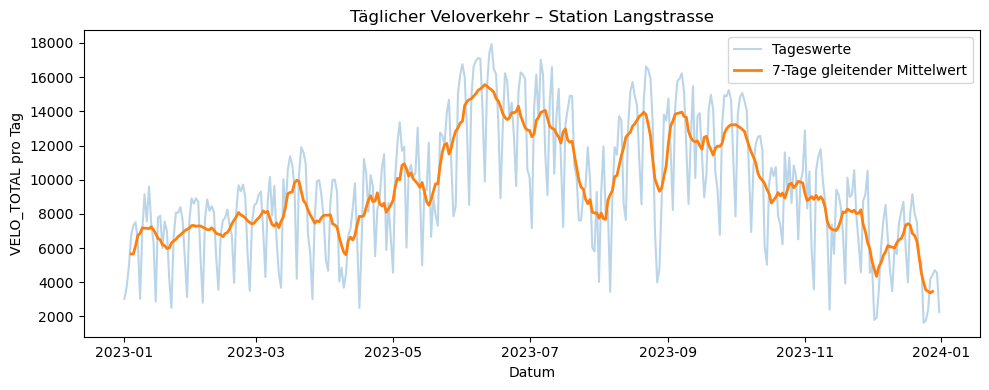

In [18]:
df_ls_daily = df_ls_daily.sort_values("DATUM_TAG")

df_ls_daily["VELO_TOTAL_MA7"] = (
    df_ls_daily["VELO_TOTAL"]
    .rolling(window=7, center=True)
    .mean()
)

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(
    df_ls_daily["DATUM_TAG"],
    df_ls_daily["VELO_TOTAL"],
    alpha=0.3,
    label="Tageswerte"
)

ax.plot(
    df_ls_daily["DATUM_TAG"],
    df_ls_daily["VELO_TOTAL_MA7"],
    linewidth=2,
    label="7-Tage gleitender Mittelwert"
)

ax.set_title("Täglicher Veloverkehr – Station Langstrasse")
ax.set_xlabel("Datum")
ax.set_ylabel("VELO_TOTAL pro Tag")
ax.legend()

plt.tight_layout()
plt.show()


**Wochenend-Effekt**
- Der durchschnittliche Veloverkehr unterscheidet sich klar zwischen
  Werktagen und Wochenenden.
- Diese wöchentlich wiederkehrende Struktur erklärt einen grossen Teil
  der kurzfristigen Schwankungen in der Zeitreihe.


In [19]:
df_ls_daily["DATUM_TAG"] = pd.to_datetime(df_ls_daily["DATUM_TAG"])


In [20]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Frühling"
    elif month in [6, 7, 8]:
        return "Sommer"
    else:
        return "Herbst"

df_ls_daily["season"] = df_ls_daily["DATUM_TAG"].dt.month.apply(get_season)

df_ls_daily[["DATUM_TAG", "season"]].head()


,DATUM_TAG,season
0,2023-01-01,Winter
1,2023-01-02,Winter
2,2023-01-03,Winter
3,2023-01-04,Winter
4,2023-01-05,Winter


In [21]:
season_order = ["Winter", "Frühling", "Sommer", "Herbst"]

season_mean = (
    df_ls_daily
    .groupby("season")["VELO_TOTAL"]
    .mean()
    .reindex(season_order)
)

season_mean


season
Winter       6309.833333
Frühling     8830.771739
Sommer      12363.652174
Herbst      10404.186813
Name: VELO_TOTAL, dtype: float64

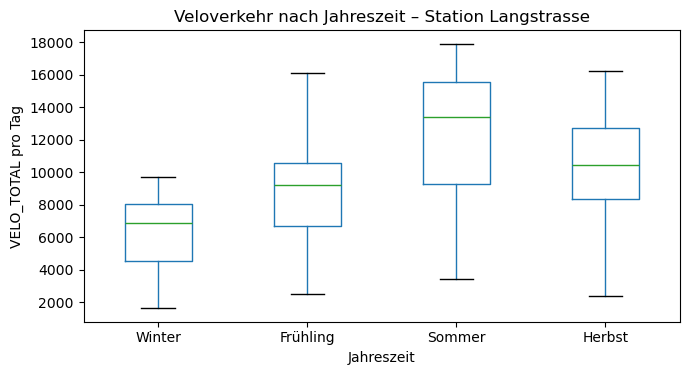

In [22]:
season_order = ["Winter", "Frühling", "Sommer", "Herbst"]

df_ls_daily["season"] = pd.Categorical(
    df_ls_daily["season"],
    categories=season_order,
    ordered=True
)


fig, ax = plt.subplots(figsize=(7, 4))

df_ls_daily.boxplot(
    column="VELO_TOTAL",
    by="season",
    ax=ax,
    grid=False
)

ax.set_title("Veloverkehr nach Jahreszeit – Station Langstrasse")
ax.set_xlabel("Jahreszeit")
ax.set_ylabel("VELO_TOTAL pro Tag")

plt.suptitle("")  # entfernt automatische Pandas-Überschrift
plt.tight_layout()
plt.show()



## Saisonalität des Veloverkehrs

Die Verteilung des täglichen Veloverkehrs unterscheidet sich deutlich
zwischen den Jahreszeiten.

- Im Winter sind die Verkehrsaufkommen am niedrigsten.
- Die höchsten Werte treten im Sommer auf.
- Frühling und Herbst liegen dazwischen, weisen jedoch eine höhere Streuung auf.

Diese Ergebnisse bestätigen eine ausgeprägte saisonale Struktur der Zeitreihe.


In [23]:
df_loc[
    df_loc["bezeichnung"].str.contains("Scheuchzer", case=False, na=False)
][["id1", "bezeichnung"]]


,id1,bezeichnung
33,8,Scheuchzerstrasse
43,2993,Scheuchzerstrasse
146,3918,Scheuchzerstrasse
158,3925,Scheuchzerstrasse


In [24]:
scheuchzer_ids = [8, 2993, 3918, 3925]
df_scheuchzer = df[df["FK_STANDORT"].isin(scheuchzer_ids)].copy()
df_scheuchzer["DATUM"] = pd.to_datetime(df_scheuchzer["DATUM"])
df_scheuchzer["DATUM_TAG"] = df_scheuchzer["DATUM"].dt.date



In [25]:
df_scheuchzer_daily = (
    df_scheuchzer
    .groupby("DATUM_TAG")[["VELO_IN", "VELO_OUT"]]
    .sum()
    .reset_index()
)

df_scheuchzer_daily["VELO_TOTAL"] = (
    df_scheuchzer_daily["VELO_IN"] + df_scheuchzer_daily["VELO_OUT"]
)


In [26]:
df_scheuchzer_daily["DATUM_TAG"] = pd.to_datetime(df_scheuchzer_daily["DATUM_TAG"])
df_scheuchzer_daily["weekday"] = df_scheuchzer_daily["DATUM_TAG"].dt.day_name()


In [27]:
weekday_mean_scheuchzer = (
    df_scheuchzer_daily
    .groupby("weekday")["VELO_TOTAL"]
    .mean()
)


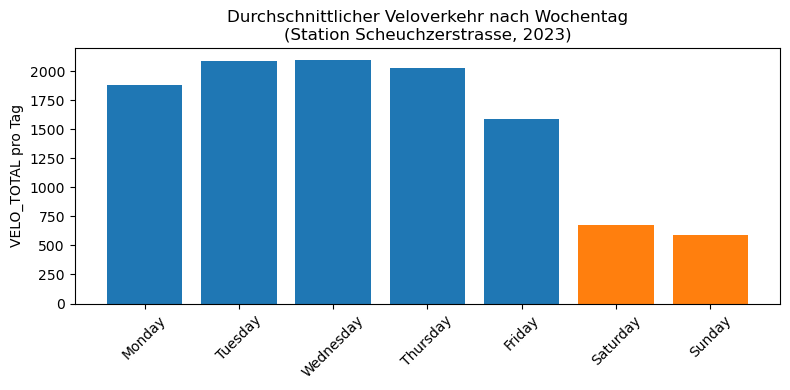

In [28]:
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

weekday_mean_scheuchzer = weekday_mean_scheuchzer.reindex(weekday_order)

colors = [
    "tab:blue" if day in ["Monday","Tuesday","Wednesday","Thursday","Friday"]
    else "tab:orange"
    for day in weekday_mean_scheuchzer.index
]

plt.figure(figsize=(8,4))
plt.bar(
    weekday_mean_scheuchzer.index,
    weekday_mean_scheuchzer.values,
    color=colors
)

plt.title(
    "Durchschnittlicher Veloverkehr nach Wochentag\n"
    "(Station Scheuchzerstrasse, 2023)"
)
plt.ylabel("VELO_TOTAL pro Tag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
df_scheuchzer_daily = df_scheuchzer_daily.sort_values("DATUM_TAG")

df_scheuchzer_daily["VELO_TOTAL_MA7"] = (
    df_scheuchzer_daily["VELO_TOTAL"]
    .rolling(window=7, center=True)
    .mean()
)


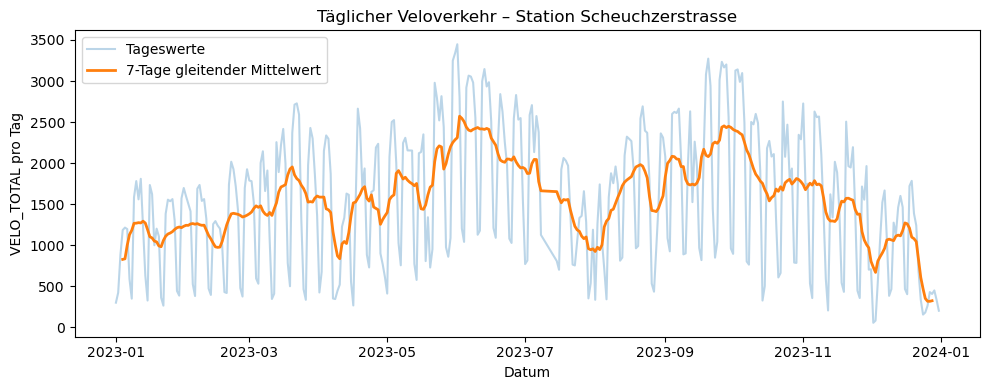

In [30]:
df_scheuchzer_daily = df_scheuchzer_daily.sort_values("DATUM_TAG")

df_scheuchzer_daily["VELO_TOTAL_MA7"] = (
    df_scheuchzer_daily["VELO_TOTAL"]
    .rolling(window=7, center=True)
    .mean()
)

fig, ax = plt.subplots(figsize=(10, 4))

# Tageswerte (Standardfarbe, transparent)
ax.plot(
    df_scheuchzer_daily["DATUM_TAG"],
    df_scheuchzer_daily["VELO_TOTAL"],
    alpha=0.3,
    label="Tageswerte"
)

# 7-Tage-Mittelwert (ORANGE – wie bei Langstrasse)
ax.plot(
    df_scheuchzer_daily["DATUM_TAG"],
    df_scheuchzer_daily["VELO_TOTAL_MA7"],
    color="tab:orange",
    linewidth=2,
    label="7-Tage gleitender Mittelwert"
)

ax.set_title("Täglicher Veloverkehr – Station Scheuchzerstrasse")
ax.set_xlabel("Datum")
ax.set_ylabel("VELO_TOTAL pro Tag")
ax.legend()

plt.tight_layout()
plt.show()


In [31]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Frühling"
    elif month in [6, 7, 8]:
        return "Sommer"
    else:
        return "Herbst"


df_scheuchzer_daily["season"] = df_scheuchzer_daily["DATUM_TAG"].apply(get_season)


In [32]:
season_order = ["Winter", "Frühling", "Sommer", "Herbst"]

df_scheuchzer_daily["season"] = pd.Categorical(
    df_scheuchzer_daily["season"],
    categories=season_order,
    ordered=True
)


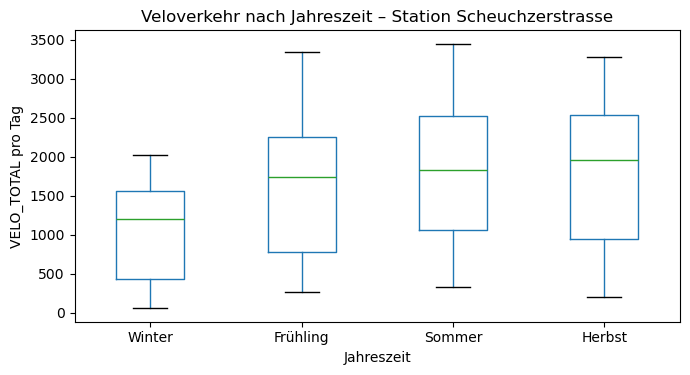

In [33]:
fig, ax = plt.subplots(figsize=(7, 4))

df_scheuchzer_daily.boxplot(
    column="VELO_TOTAL",
    by="season",
    ax=ax,
    grid=False
)

ax.set_title("Veloverkehr nach Jahreszeit – Station Scheuchzerstrasse")
ax.set_xlabel("Jahreszeit")
ax.set_ylabel("VELO_TOTAL pro Tag")

plt.suptitle("")  # entfernt automatische Pandas-Überschrift
plt.tight_layout()
plt.show()
